In [61]:
# Khai báo thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# Đọc dữ liệu
data = pd.read_csv('/content/sample_data/waterQuality1.csv')
data.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


In [63]:
# Xuất thông tin
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10179 entries, 0 to 10178
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    10179 non-null  float64
 1   ammonia      10179 non-null  object 
 2   arsenic      10179 non-null  float64
 3   barium       10179 non-null  float64
 4   cadmium      10179 non-null  float64
 5   chloramine   10179 non-null  float64
 6   chromium     10179 non-null  float64
 7   copper       10179 non-null  float64
 8   flouride     10179 non-null  float64
 9   bacteria     10179 non-null  float64
 10  viruses      10179 non-null  float64
 11  lead         10179 non-null  float64
 12  nitrates     10179 non-null  float64
 13  nitrites     10179 non-null  float64
 14  mercury      10179 non-null  float64
 15  perchlorate  10179 non-null  float64
 16  radium       10179 non-null  float64
 17  selenium     10179 non-null  float64
 18  silver       10179 non-null  float64
 19  uran

DataFrame có 10179 hàng và 21 cột.

Một số cột như 'aluminium', 'arsenic', 'barium',... đều chứa giá trị số thực (float64) và có đầy đủ các giá trị (non-null count = 10179).

Tuy nhiên, cột 'ammonia' và 'is_safe' có kiểu dữ liệu là 'object', có thể đại diện cho chuỗi hoặc các kiểu dữ liệu khác không phải số thực. Cột 'ammonia' ban đầu có kiểu dữ liệu là object (có thể chứa chuỗi hoặc giá trị số) và cần được chuyển đổi thành kiểu dữ liệu số thực (float64) để có thể tiếp tục phân tích dữ liệu một cách chính xác.

In [64]:
#loại bỏ các hàng có giá trị không hợp lệ
data = data[~data['is_safe'].str.contains('#NUM!')]
data['is_safe'] = data['is_safe'].astype(float)
data = data[~data['ammonia'].str.contains('#NUM!')]
data['ammonia'] = data['ammonia'].astype(float)

In [65]:
# Xác định features và target variable
features = data.drop('is_safe', axis=1)
target = data['is_safe']

In [66]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [67]:
# Khởi tạo mô hình SVM
svm_model = SVC(kernel='linear')

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = svm_model.predict(X_test)

# Đánh giá hiệu suất của mô hình
report = classification_report(y_test, predictions)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, predictions)

# In ra độ chính xác
print(f"Độ chính xác của mô hình là: {accuracy}")

# In ra precision, recall và F1-score từ báo cáo đánh giá
print(report)

Độ chính xác của mô hình là: 0.8580550098231827
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1648
         1.0       0.71      0.43      0.53       388

    accuracy                           0.86      2036
   macro avg       0.80      0.69      0.72      2036
weighted avg       0.85      0.86      0.84      2036



In [68]:
# Lấy các hệ số của mô hình SVM
coefficients = svm_model.coef_.ravel()

# Tạo một DataFrame để lưu trữ các hệ số và tên của các đặc trưng
feature_importance = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# In ra danh sách đặc trưng theo độ quan trọng giảm dần
print(feature_importance)

        Feature  Coefficient
6      chromium     0.660580
0     aluminium     0.512578
9      bacteria     0.291170
18       silver     0.245581
11         lead     0.097414
5    chloramine     0.080439
3        barium     0.003376
8      flouride    -0.002421
16       radium    -0.011782
1       ammonia    -0.018159
12     nitrates    -0.018306
15  perchlorate    -0.028898
7        copper    -0.075086
13     nitrites    -0.089168
10      viruses    -0.318417
14      mercury    -0.470365
17     selenium    -0.815300
19      uranium    -1.944460
2       arsenic    -3.117132
4       cadmium    -4.780541


- Các đặc trưng có hệ số dương cao như 'chromium', 'aluminium', 'bacteria',... được coi là quan trọng với mô hình. Giá trị dương cho thấy đối với mô hình, mỗi đặc trưng này đóng vai trò tích cực trong việc dự đoán lớp mục tiêu.

- Ngược lại, các đặc trưng có hệ số âm như 'uranium', 'arsenic', 'cadmium',... đóng vai trò tiêu cực trong dự đoán. Mức độ âm của hệ số cho thấy mô hình đánh giá các đặc trưng này là có ảnh hưởng tiêu cực đối với việc phân loại.

- Cụ thể, đặc trưng "chromium" có hệ số dương cao nhất (0.660580), ngược lại "cadmium" và "arsenic" có hệ số âm thấp nhất (-4.780541 và -3.117132 tương ứng). Điều này chỉ ra rằng "chromium" có ảnh hưởng tích cực lớn nhất đối với dự đoán của mô hình, trong khi "cadmium" và "arsenic" có ảnh hưởng tiêu cực lớn nhất.

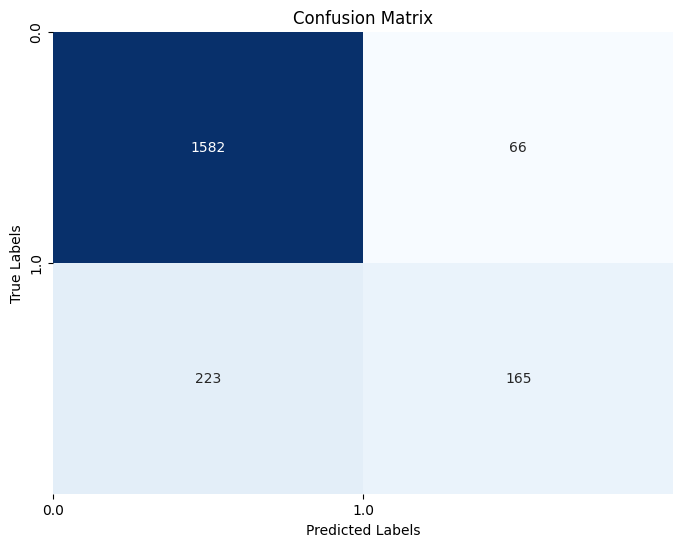

In [69]:
# Định nghĩa ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, predictions)

# Tạo heatmap từ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_names = sorted(y_test.unique())  # Lấy tên các lớp từ dữ liệu thực tế
plt.xticks(ticks=range(len(class_names)), labels=class_names)
plt.yticks(ticks=range(len(class_names)), labels=class_names)

plt.title('Confusion Matrix')
plt.show()


In [71]:
# Xác định features và target variable
X = data.drop('is_safe', axis=1)  # Loại bỏ cột nhãn
y = data['is_safe']  # Cột nhãn

# Khởi tạo mô hình cây quyết định
clf = DecisionTreeClassifier()

# Huấn luyện mô hình
clf.fit(X, y)

# Export và in ra biểu diễn văn bản của cây quyết định
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules),

|--- aluminium <= 0.41
|   |--- aluminium <= 0.15
|   |   |--- uranium <= 0.03
|   |   |   |--- chloramine <= 0.78
|   |   |   |   |--- nitrites <= 1.00
|   |   |   |   |   |--- viruses <= 0.01
|   |   |   |   |   |   |--- nitrates <= 10.03
|   |   |   |   |   |   |   |--- lead <= 0.03
|   |   |   |   |   |   |   |   |--- barium <= 0.94
|   |   |   |   |   |   |   |   |   |--- ammonia <= 3.82
|   |   |   |   |   |   |   |   |   |   |--- selenium <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- selenium >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- ammonia >  3.82
|   |   |   |   |   |   |   |   |   |   |--- flouride <= 0.41
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- flouride >  0.41
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- barium >  0.94
|   |  

(None,)